<a href="https://colab.research.google.com/github/juma-paul/deep_learning/blob/main/LinearRegressionAsASingleNeuronNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Single Neuron Neural Network to predict Car Prices

## 1. Install packages and read Dataset into DataFrame

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

file_path_car_price_dataset = '/content/drive/MyDrive/Datasets/car_price.csv'

Mounted at /content/drive


In [3]:
data = pd.read_csv(file_path_car_price_dataset)

In [4]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
data.rename(columns = {
    'car_ID': 'car_id',
    'symboling': 'safety_rating',
    'CarName': 'car_name',
    'fueltype': 'fuel_type',
    'aspiration': 'aspiration_type',
    'doornumber': 'door_number',
    'carbody': 'car_body_style',
    'drivewheel': 'drive_wheel_type',
    'enginelocation': 'engine_location',
    'wheelbase': 'wheel_base',
    'carlength': 'car_length',
    'carwidth': 'car_width',
    'carheight': 'car_height',
    'curbweight': 'curb_weight',
    'enginetype': 'engine_type',
    'cylindernumber': 'cylinder_number',
    'enginesize': 'engine_size',
    'fuelsystem': 'fuel_system',
    'boreratio': 'bore_ratio',
    'stroke': 'stroke_length',
    'compressionratio': 'compression_ratio',
    'horsepower': 'horse_power',
    'peakrpm': 'peak_rpm',
    'citympg': 'city_mpg',
    'highwaympg': 'highway_mpg',
    'price': 'price'
}, inplace=True)

In [7]:
data = data[['safety_rating', 'fuel_type', 'aspiration_type', 'car_body_style', 'drive_wheel_type', 'engine_location', 'car_length',
      'car_width', 'curb_weight', 'cylinder_number', 'engine_size', 'bore_ratio', 'compression_ratio', 'horse_power', 'peak_rpm',
      'city_mpg', 'highway_mpg', 'price']].copy()

In [8]:
data.head()

,safety_rating,fuel_type,aspiration_type,car_body_style,drive_wheel_type,engine_location,car_length,car_width,curb_weight,cylinder_number,engine_size,bore_ratio,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,3,gas,std,convertible,rwd,front,168.8,64.1,2548,four,130,3.47,9.0,111,5000,21,27,13495.0
1,3,gas,std,convertible,rwd,front,168.8,64.1,2548,four,130,3.47,9.0,111,5000,21,27,16500.0
2,1,gas,std,hatchback,rwd,front,171.2,65.5,2823,six,152,2.68,9.0,154,5000,19,26,16500.0
3,2,gas,std,sedan,fwd,front,176.6,66.2,2337,four,109,3.19,10.0,102,5500,24,30,13950.0
4,2,gas,std,sedan,4wd,front,176.6,66.4,2824,five,136,3.19,8.0,115,5500,18,22,17450.0


In [9]:
data.dtypes

,0
safety_rating,int64
fuel_type,object
aspiration_type,object
car_body_style,object
drive_wheel_type,object
engine_location,object
car_length,float64
car_width,float64
curb_weight,int64
cylinder_number,object


In [10]:
data.duplicated().sum()

2

In [11]:
data = data[data.duplicated(keep='first') | ~data.duplicated(keep=False)]
data.duplicated().sum()

0

In [12]:
data.isnull().sum()

,0
safety_rating,0
fuel_type,0
aspiration_type,0
car_body_style,0
drive_wheel_type,0
engine_location,0
car_length,0
car_width,0
curb_weight,0
cylinder_number,0


## 2. Perform One-hot Encoding on Categorical Columns

In [13]:
categorical = data.select_dtypes(include='object')
categorical

,fuel_type,aspiration_type,car_body_style,drive_wheel_type,engine_location,cylinder_number
0,gas,std,convertible,rwd,front,four
1,gas,std,convertible,rwd,front,four
2,gas,std,hatchback,rwd,front,six
3,gas,std,sedan,fwd,front,four
4,gas,std,sedan,4wd,front,five
...,...,...,...,...,...,...
200,gas,std,sedan,rwd,front,four
201,gas,turbo,sedan,rwd,front,four
202,gas,std,sedan,rwd,front,six
203,diesel,turbo,sedan,rwd,front,six


In [14]:
data = pd.get_dummies(data, columns=list(categorical), drop_first=True)
data

,safety_rating,car_length,car_width,curb_weight,engine_size,bore_ratio,compression_ratio,horse_power,peak_rpm,city_mpg,...,car_body_style_wagon,drive_wheel_type_fwd,drive_wheel_type_rwd,engine_location_rear,cylinder_number_five,cylinder_number_four,cylinder_number_six,cylinder_number_three,cylinder_number_twelve,cylinder_number_two
0,3,168.8,64.1,2548,130,3.47,9.0,111,5000,21,...,False,False,True,False,False,True,False,False,False,False
1,3,168.8,64.1,2548,130,3.47,9.0,111,5000,21,...,False,False,True,False,False,True,False,False,False,False
2,1,171.2,65.5,2823,152,2.68,9.0,154,5000,19,...,False,False,True,False,False,False,True,False,False,False
3,2,176.6,66.2,2337,109,3.19,10.0,102,5500,24,...,False,True,False,False,False,True,False,False,False,False
4,2,176.6,66.4,2824,136,3.19,8.0,115,5500,18,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,188.8,68.9,2952,141,3.78,9.5,114,5400,23,...,False,False,True,False,False,True,False,False,False,False
201,-1,188.8,68.8,3049,141,3.78,8.7,160,5300,19,...,False,False,True,False,False,True,False,False,False,False
202,-1,188.8,68.9,3012,173,3.58,8.8,134,5500,18,...,False,False,True,False,False,False,True,False,False,False
203,-1,188.8,68.9,3217,145,3.01,23.0,106,4800,26,...,False,False,True,False,False,False,True,False,False,False


## 3. Prepare Data: Separate features from target, Normalize features, Split dataset into training and test data

In [15]:
# Separate features from target
X = data.drop('price', axis=1)
y = data['price']

In [16]:
X

,safety_rating,car_length,car_width,curb_weight,engine_size,bore_ratio,compression_ratio,horse_power,peak_rpm,city_mpg,...,car_body_style_wagon,drive_wheel_type_fwd,drive_wheel_type_rwd,engine_location_rear,cylinder_number_five,cylinder_number_four,cylinder_number_six,cylinder_number_three,cylinder_number_twelve,cylinder_number_two
0,3,168.8,64.1,2548,130,3.47,9.0,111,5000,21,...,False,False,True,False,False,True,False,False,False,False
1,3,168.8,64.1,2548,130,3.47,9.0,111,5000,21,...,False,False,True,False,False,True,False,False,False,False
2,1,171.2,65.5,2823,152,2.68,9.0,154,5000,19,...,False,False,True,False,False,False,True,False,False,False
3,2,176.6,66.2,2337,109,3.19,10.0,102,5500,24,...,False,True,False,False,False,True,False,False,False,False
4,2,176.6,66.4,2824,136,3.19,8.0,115,5500,18,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,188.8,68.9,2952,141,3.78,9.5,114,5400,23,...,False,False,True,False,False,True,False,False,False,False
201,-1,188.8,68.8,3049,141,3.78,8.7,160,5300,19,...,False,False,True,False,False,True,False,False,False,False
202,-1,188.8,68.9,3012,173,3.58,8.8,134,5500,18,...,False,False,True,False,False,False,True,False,False,False
203,-1,188.8,68.9,3217,145,3.01,23.0,106,4800,26,...,False,False,True,False,False,False,True,False,False,False


In [17]:
y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [18]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# Split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, random_state=42)

## 4. Define the model with input layer and output layer with a single neuron

In [20]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(1)])

## 5. Compile the model

In [21]:
model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.02),
        loss='mean_squared_error'
    )

## 6. Train, Evaluate, Predict

In [22]:
history = model.fit(
        X_train, y_train,
        epochs=450,
        batch_size=30,
        validation_data=(X_test, y_test),
        verbose=0
    )

In [29]:
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss:,.2f}")

Test Loss (MSE): 18,104,906.00


In [31]:
rmse = np.sqrt(test_loss)
print(f"Test Loss (RMSE): {rmse:,.2f}")

Test Loss (RMSE): 4,254.99


In [30]:
variance = np.var(y_test)
print(f"Variance of Actual Values: {variance:,.2f}")

Variance of Actual Values: 103,448,049.48


In [24]:
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


## 7. Plot results

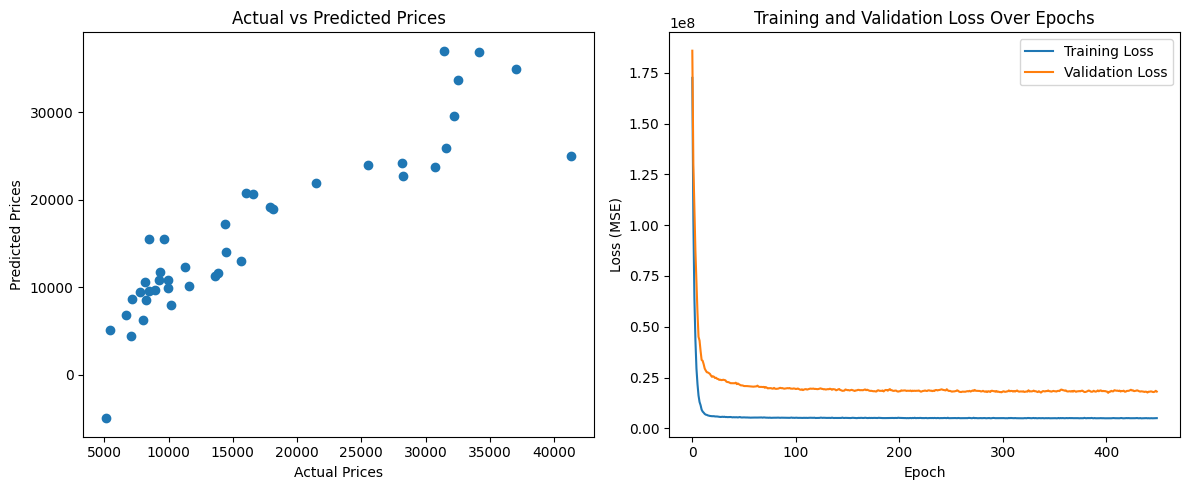

In [25]:
# Plot the predicted vs actual values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')

# Plot the training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

## Conclusion

#### The model makes predictions that are off by about 4,255 units on average. This is reasonable because the actual data has a lot of variation (a variance of 103,448,049.48).